# Overview predefined lattices

This notebook simply extracts the plots from the docstrings of the predefined lattices and plots them.

This is usefull to get an overview of the various lattices, and their defined `pairs` and `order` options.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5, suppress=True, linewidth=100)
plt.rcParams['figure.dpi'] = 150

In [2]:
import tenpy

from tenpy.models.lattice import *
import inspect

In [3]:
def extract_plots(doc_string):
    """Extract `.. plot ::` parts from a doc-string."""
    doc = inspect.cleandoc(doc_string)
    plots = []
    plot_lines = None
    for line in doc.splitlines():
        if plot_lines is not None:
            if line.startswith('    '):
                plot_lines.append(line[4:])
            elif not line:
                plot_lines.append('\n')
            else:
                plots.append('\n'.join(plot_lines))
                plot_lines = None
        if plot_lines is None:
            if line.startswith('.. plot ::'):
                plot_lines = []
    return plots

def extract_sample_instance(doc_string):
    for line in doc_string.splitlines():
        line = line.strip()
        if line.startswith('lat ='):
            return eval(line[6:], globals())
    return None

In [4]:
def show(Cls):
    
    print("=" * 80)
    print(f"    {Cls.__qualname__}    in {Cls.__module__}")
    print("=" * 80)
    lat = extract_sample_instance(Cls.__doc__)
    print("defined pairs: ")
    for k in lat.pairs.keys():
        print('    ' + k)
    plot_codes = extract_plots(Cls.__doc__)
    for code in plot_codes:
        print(code)
        exec(code)

## 1D lattices

    Chain    in tenpy.models.lattice
defined pairs: 
    nearest_neighbors
    next_nearest_neighbors
    next_next_nearest_neighbors


import matplotlib.pyplot as plt
from tenpy.models import lattice
plt.figure(figsize=(5, 1.4))
ax = plt.gca()
lat = lattice.Chain(4, None, bc='periodic')
lat.plot_coupling(ax, linewidth=3.)
lat.plot_sites(ax)
lat.plot_basis(ax, origin=(-0.5, -0.25), shade=False)
ax.set_xlim(-1.)
ax.set_ylim(-0.5, 0.5)
ax.set_aspect('equal')
plt.show()




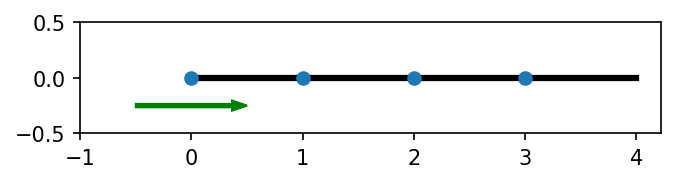



import matplotlib.pyplot as plt
from tenpy.models import lattice
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 3))
lat = lattice.Chain(8, None, bc='periodic')
order_names=['default', 'folded']
for order_name, ax in zip(order_names, axes.flatten()):
    lat.plot_coupling(ax, linestyle='-', linewidth=1)
    lat.order = lat.ordering(order_name)
    lat.plot_sites(ax)
    lat.plot_order(ax, linestyle=':', linewidth=2)
    lat.plot_basis(ax, origin=(-0.5, -0.25), shade=False)
    ax.set_title(f"order={order_name!r}")
    ax.set_aspect('equal')
    ax.set_xlim(-0.8)
    ax.set_ylim(-0.5, 0.5)
plt.show()




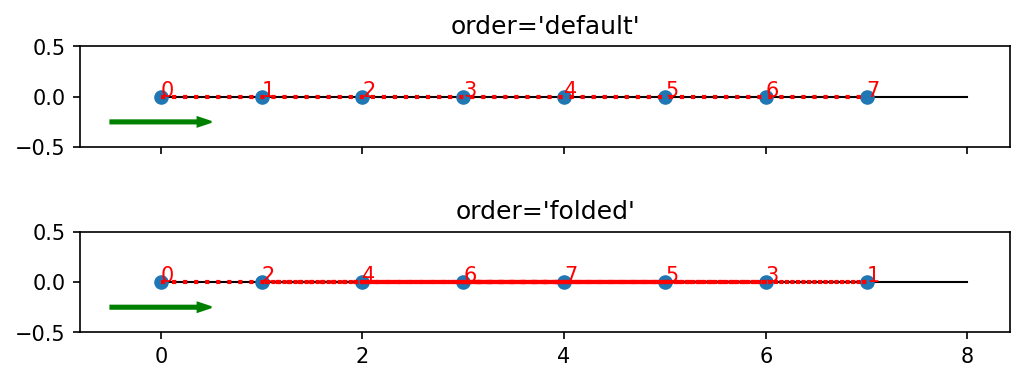

In [5]:
show(Chain)

    Ladder    in tenpy.models.lattice
defined pairs: 
    nearest_neighbors
    next_nearest_neighbors
    next_next_nearest_neighbors
    rung_NN
    leg_NN
    diagonal


import matplotlib.pyplot as plt
from tenpy.models import lattice
plt.figure(figsize=(7., 2.))
ax = plt.gca()
lat = lattice.Ladder(4, None, bc='periodic')
for key, lw in zip(['rung_NN', 'leg_NN', 'diagonal'],
                    [3., 2., 1.],):
    pairs = lat.pairs[key]
    lat.plot_coupling(ax, pairs, linestyle='--', linewidth=lw, label=key)
ax.plot([], [], ' ', label='nearest_neighbors =\n  rung_NN + leg_NN')
lat.plot_sites(ax)
lat.plot_basis(ax, origin=[-0.5, -0.25], shade=False)
ax.set_aspect('equal')
ax.set_xlim(-1.)
ax.set_ylim(-0.5, 1.5)
ax.legend(loc='upper left', bbox_to_anchor=(1., 1.))
plt.show()




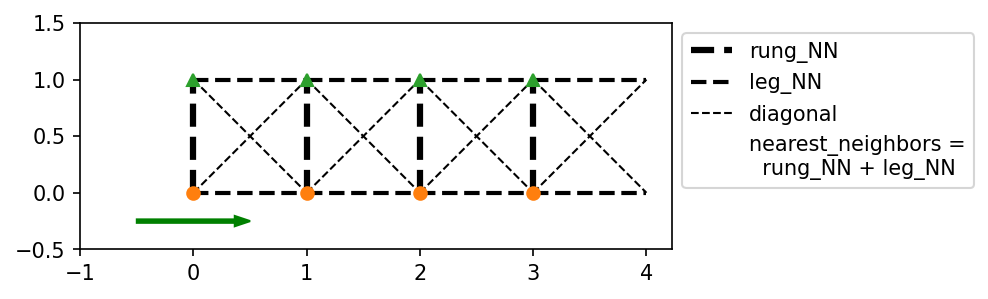



import matplotlib.pyplot as plt
from tenpy.models import lattice
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 5))
lat = lattice.Ladder(8, None, bc='periodic')
order_names=['default', 'folded', 'snakeFstyle']
for order_name, ax in zip(order_names, axes.flatten()):
    lat.plot_coupling(ax, linestyle='-', linewidth=1)
    lat.order = lat.ordering(order_name)
    lat.plot_order(ax, linestyle=':', linewidth=2)
    lat.plot_sites(ax)
    lat.plot_basis(ax, origin=(-0.5, +0.5), shade=False)
    ax.set_title(f"order={order_name!r}")
    ax.set_aspect('equal')
    ax.set_xlim(-0.8)
    ax.set_ylim(-0.2, 1.2)
plt.show()






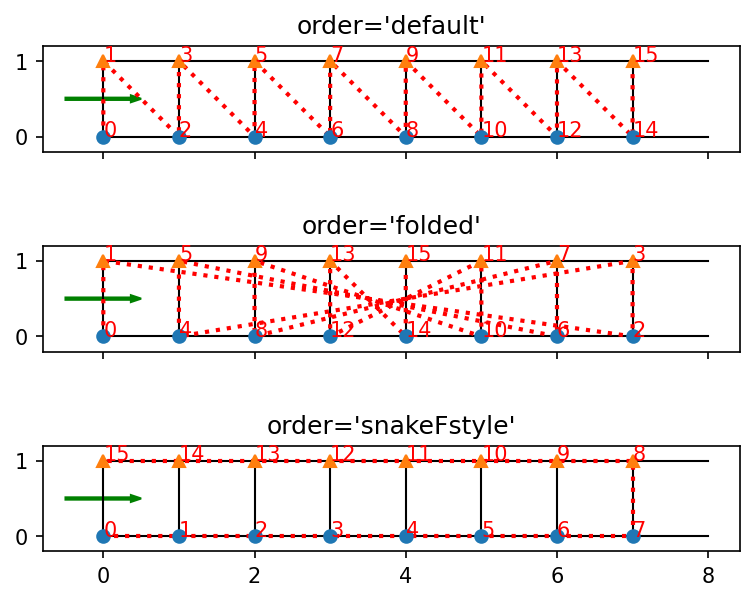

In [6]:
show(Ladder)

    NLegLadder    in tenpy.models.lattice
defined pairs: 
    rung_NN
    leg_NN
    nearest_neighbors
    diagonal


import matplotlib.pyplot as plt
from tenpy.models import lattice
plt.figure(figsize=(7., 2.))
ax = plt.gca()
lat = lattice.NLegLadder(8, 3, None, bc='periodic')
for key, lw in zip(['rung_NN', 'leg_NN', 'diagonal'], [3., 2., 1.]):
    pairs = lat.pairs[key]
    lat.plot_coupling(ax, pairs, linestyle='--', linewidth=lw, label=key)
ax.plot([], [], ' ', label='nearest_neighbors =\n  rung_NN + leg_NN')
lat.plot_sites(ax)
lat.plot_basis(ax, origin=[-0.5, -0.25], shade=False)
ax.set_aspect('equal')
ax.set_xlim(-1.)
ax.set_ylim(-0.5, 1.5)
ax.legend(loc='upper left', bbox_to_anchor=(1., 1.))
plt.show()




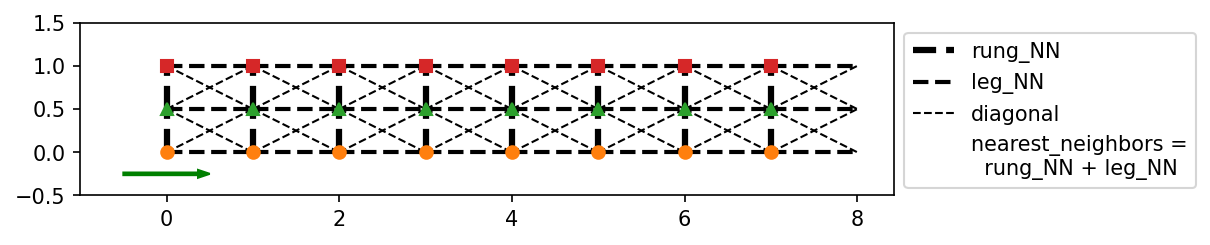



import matplotlib.pyplot as plt
from tenpy.models import lattice
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 5))
lat = lattice.NLegLadder(8, 3, None, bc='periodic')
order_names=['default', 'snakeFstyle', 'folded']
for order_name, ax in zip(order_names, axes.flatten()):
    lat.plot_coupling(ax, linestyle='-', linewidth=1)
    lat.order = lat.ordering(order_name)
    lat.plot_order(ax, linestyle=':', linewidth=2)
    lat.plot_sites(ax)
    lat.plot_basis(ax, origin=(-0.5, +0.5), shade=False)
    ax.set_title(f"order={order_name!r}")
    ax.set_aspect('equal')
    ax.set_xlim(-0.8)
    ax.set_ylim(-0.2, 1.2)
plt.show()






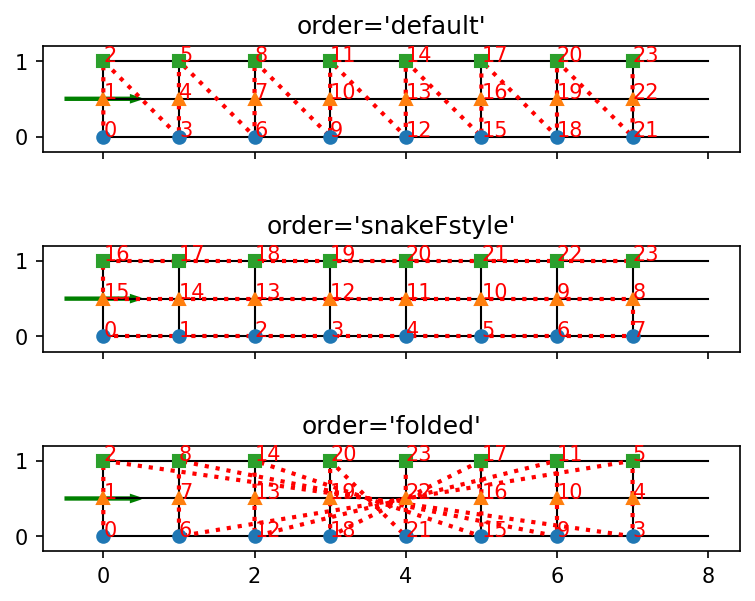

In [7]:
show(NLegLadder)

## 2D lattices

    Square    in tenpy.models.lattice
defined pairs: 
    nearest_neighbors
    next_nearest_neighbors
    next_next_nearest_neighbors


import matplotlib.pyplot as plt
from tenpy.models import lattice
plt.figure(figsize=(7, 8))
ax = plt.gca()
lat = lattice.Square(4, 4, None, bc='periodic')
lat.plot_coupling(ax, linestyle='-', linewidth=3, label='nearest_neighbors')
for key, lw in zip(['next_nearest_neighbors',
                    'next_next_nearest_neighbors'],
                [1.5, 1.]):
    pairs = lat.pairs[key]
    lat.plot_coupling(ax, pairs, linestyle='--', linewidth=lw, color='gray', label=key)
lat.plot_sites(ax)
lat.plot_basis(ax, origin=-0.5*(lat.basis[0] + lat.basis[1]))
ax.set_aspect('equal')
ax.set_xlim(-1, 5.2)
ax.set_ylim(-1.2, 6)
ax.legend(loc='upper left')
plt.show()




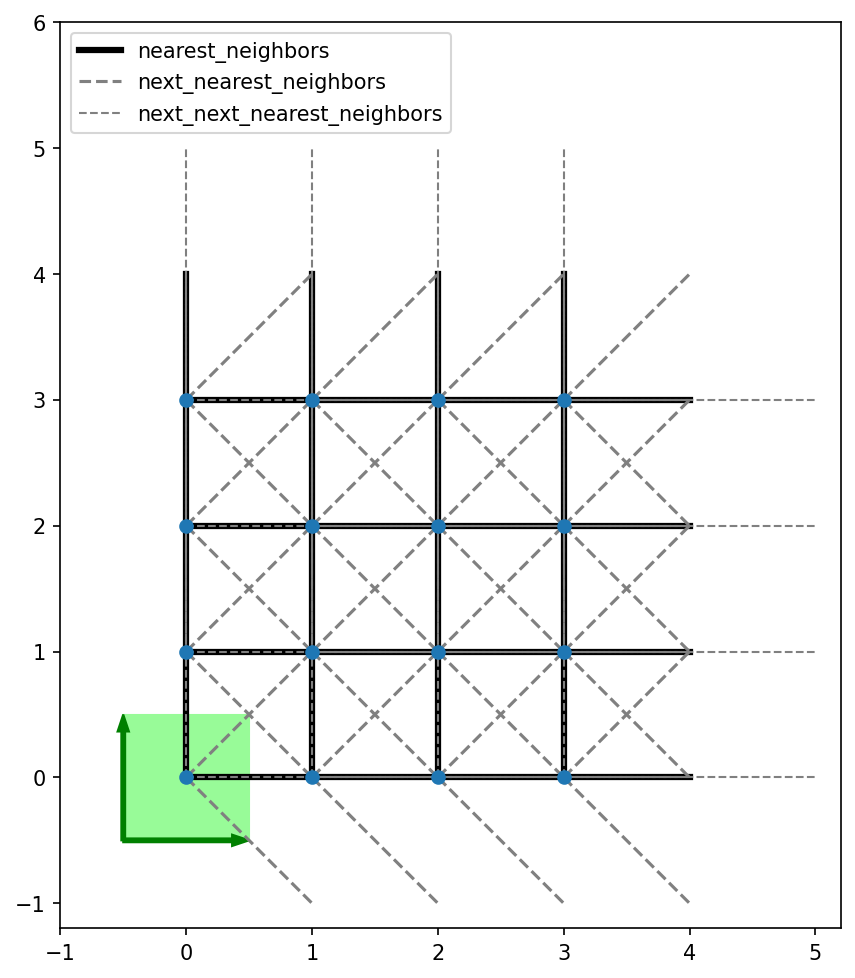



import matplotlib.pyplot as plt
from tenpy.models import lattice
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(8, 5))
lat = lattice.Square(5, 4, None, bc='periodic')
order_names=['default', 'snake', 'Fstyle']
for order_name, ax in zip(order_names, axes.flatten()):
    lat.plot_coupling(ax, linestyle='-', linewidth=1)
    lat.order = lat.ordering(order_name)
    lat.plot_order(ax, linestyle=':', linewidth=2)
    lat.plot_sites(ax)
    lat.plot_basis(ax, origin=(-0.5, -0.5))
    ax.set_title(f"order={order_name!r}")
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')
plt.show()




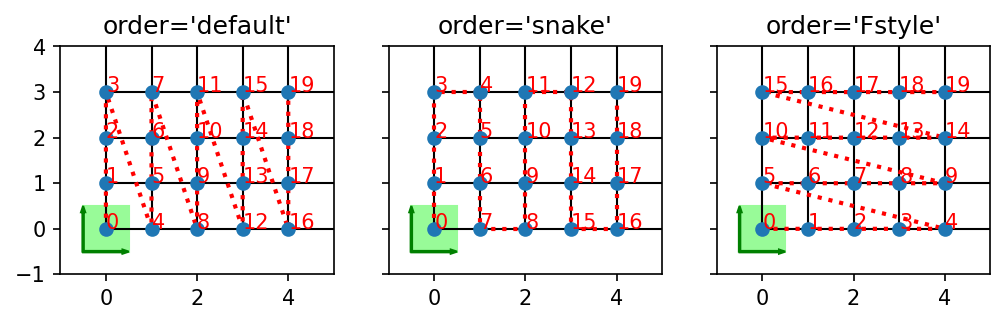

In [8]:
show(Square)

    Triangular    in tenpy.models.lattice
defined pairs: 
    nearest_neighbors
    next_nearest_neighbors
    next_next_nearest_neighbors




import matplotlib.pyplot as plt
from tenpy.models import lattice
plt.figure(figsize=(6, 8))
ax = plt.gca()
lat = lattice.Triangular(4, 4, None, bc='periodic')
lat.plot_coupling(ax, linestyle='-', linewidth=3, label='nearest_neighbors')
for key, lw in zip(['next_nearest_neighbors',
                    'next_next_nearest_neighbors'],
                [1.5, 1.]):
    pairs = lat.pairs[key]
    lat.plot_coupling(ax, pairs, linestyle='--', linewidth=lw, color='gray', label=key)
lat.plot_sites(ax)
lat.plot_basis(ax, origin=-0.5*(lat.basis[0] + lat.basis[1]))
ax.set_aspect('equal')
ax.set_xlim(-1)
ax.set_ylim(-1)
ax.legend(loc='upper left')
plt.show()




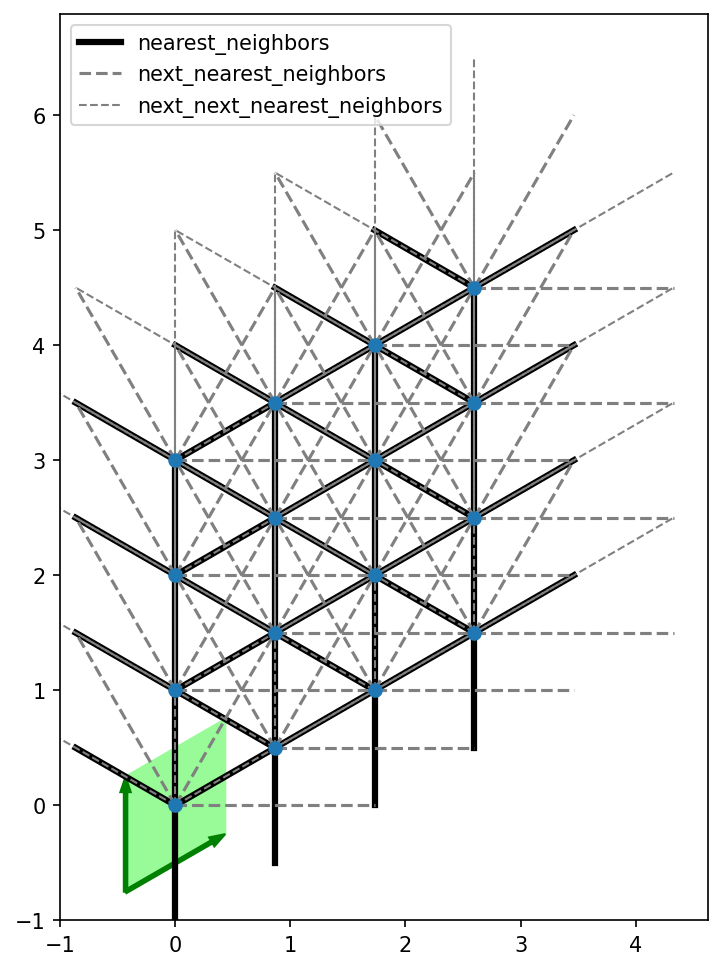



import matplotlib.pyplot as plt
from tenpy.models import lattice
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(6, 4))
lat = lattice.Triangular(4, 4, None, bc='periodic')
order_names=['default', 'snake']
for order_name, ax in zip(order_names, axes.flatten()):
    lat.plot_coupling(ax, linestyle='-', linewidth=1)
    lat.order = lat.ordering(order_name)
    lat.plot_order(ax, linestyle=':', linewidth=2)
    lat.plot_sites(ax)
    lat.plot_basis(ax, origin=(-0.5, -0.5))
    ax.set_title(f"order={order_name!r}")
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 6)
    ax.set_aspect('equal')
plt.show()






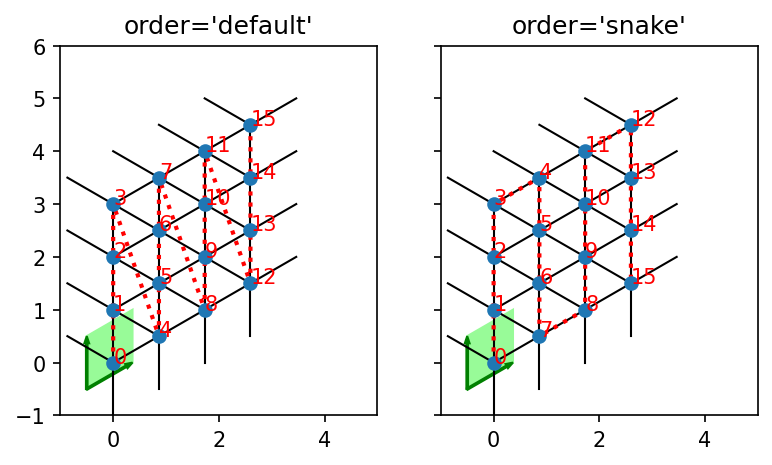

In [9]:
show(Triangular)

    Honeycomb    in tenpy.models.lattice
defined pairs: 
    nearest_neighbors
    next_nearest_neighbors
    next_next_nearest_neighbors
    fourth_nearest_neighbors
    fifth_nearest_neighbors


import matplotlib.pyplot as plt
from tenpy.models import lattice
plt.figure(figsize=(6, 8))
ax = plt.gca()
lat = lattice.Honeycomb(4, 4, None, bc='periodic')
lat.plot_coupling(ax, linestyle='-', linewidth=3, label='nearest_neighbors')
for key, lw in zip(['next_nearest_neighbors',
                    'next_next_nearest_neighbors'],
                [1.5, 1.]):
    pairs = lat.pairs[key]
    lat.plot_coupling(ax, pairs, linestyle='--', linewidth=lw, color='gray', label=key)
for key in ['fourth_nearest_neighbors', 'fifth_nearest_neighbors']:
    ax.plot([], [], ' ', label=key)
lat.plot_sites(ax)
lat.plot_basis(ax, origin=-0.5*(lat.basis[0] + lat.basis[1]))
ax.set_aspect('equal')
ax.set_xlim(-1)
ax.set_ylim(-1)
ax.legend(loc='upper left')
plt.show()




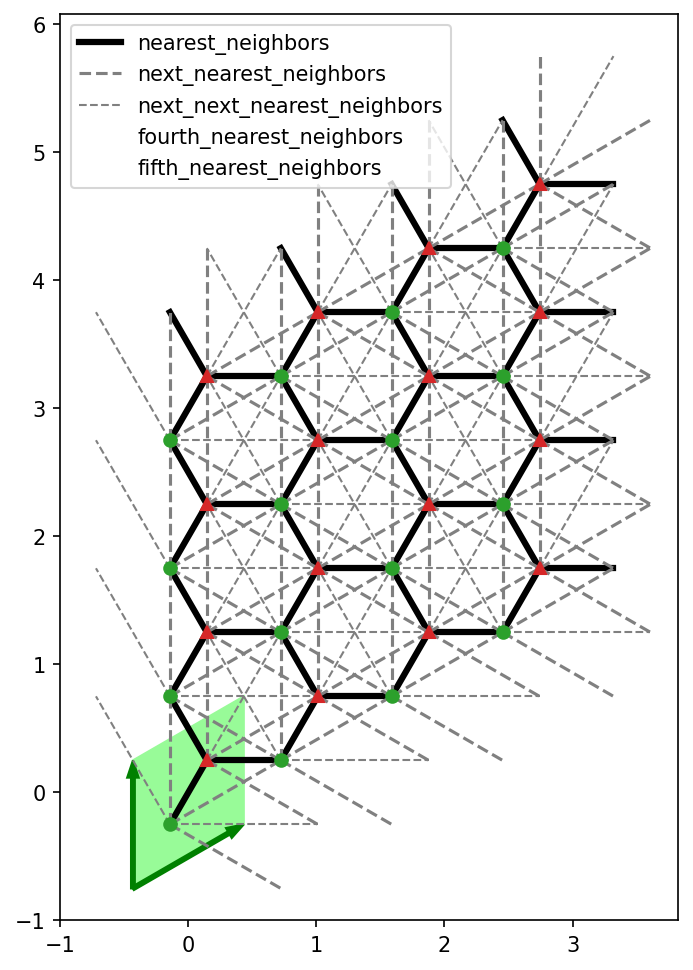



import matplotlib.pyplot as plt
from tenpy.models import lattice
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 8))
lat = lattice.Honeycomb(3, 3, None, bc='periodic')
order_names=['rings', 'Cstyle', 'snake', 'snakeCstyle']
for order_name, ax in zip(order_names, axes.flatten()):
    lat.plot_coupling(ax, linestyle='-', linewidth=1)
    lat.order = lat.ordering(order_name)
    lat.plot_order(ax, linestyle=':', linewidth=2)
    lat.plot_sites(ax)
    lat.plot_basis(ax, origin=(-0.5, -0.5))
    ax.set_title(f"order={order_name!r}")
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 4)
    ax.set_aspect('equal')
axes[0, 0].set_title("order='default'='rings'")
plt.show()




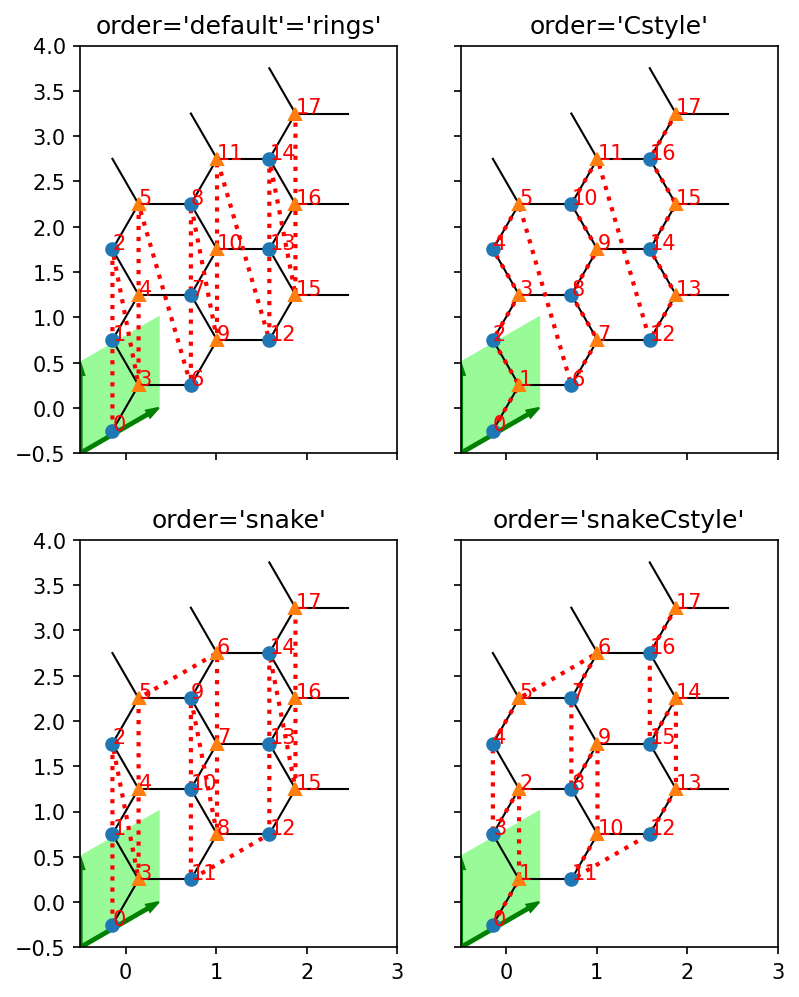

In [10]:
show(Honeycomb)

    Kagome    in tenpy.models.lattice
defined pairs: 
    nearest_neighbors
    next_nearest_neighbors
    next_next_nearest_neighbors


import matplotlib.pyplot as plt
from tenpy.models import lattice
plt.figure(figsize=(5, 4))
ax = plt.gca()
lat = lattice.Kagome(4, 4, None, bc='periodic')
lat.plot_coupling(ax, linewidth=3.)
lat.plot_order(ax, linestyle=':', linewidth=2)
lat.plot_sites(ax)
lat.plot_basis(ax, origin=-0.25*(lat.basis[0] + lat.basis[1]))
ax.set_aspect('equal')
ax.set_xlim(-1)
ax.set_ylim(-1)
plt.show()




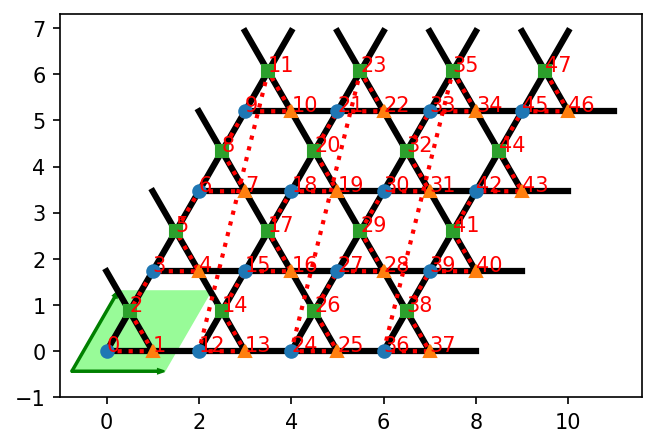



import matplotlib.pyplot as plt
from tenpy.models import lattice
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))
lat = lattice.Kagome(3, 3, None, bc='periodic')
order_names=['default', 'rings']
for order_name, ax in zip(order_names, axes.flatten()):
    lat.plot_coupling(ax, linestyle='-', linewidth=1)
    lat.order = lat.ordering(order_name)
    lat.plot_order(ax, linestyle=':', linewidth=2)
    lat.plot_sites(ax)
    lat.plot_basis(ax, origin=(-0.5, -0.5))
    ax.set_title(f"order={order_name!r}")
    ax.set_aspect('equal')
axes[0].set_title("order='default'='Cstyle'")
plt.show()




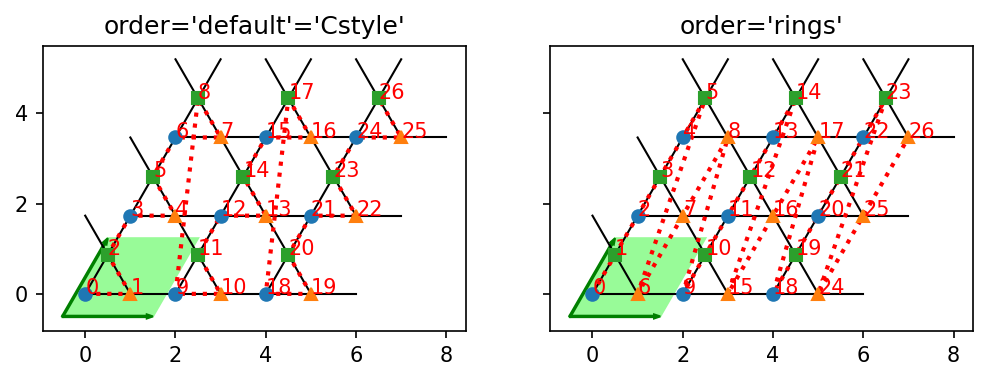

In [11]:
show(Kagome)

In [12]:
# This cell is usefull for development if you want to re-plot stuff after updating the doc-strings in TeNPy
import importlib
    
tenpy.models.lattice = importlib.reload(tenpy.models.lattice)
from tenpy.models.lattice import *

    get_order_grouped    in tenpy.models.lattice
defined pairs: 
    nearest_neighbors
    next_nearest_neighbors
    next_next_nearest_neighbors


import matplotlib.pyplot as plt
from tenpy.models import lattice
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 6))
groups = [[(0, 1, 2)], [(0, 2, 1)],
        [(0, 2), (1,)], [(0, 2), (1,)]]
priorities = [None, None, None, [1, 0, 2]]
lat = lattice.Kagome(3, 3, None, bc='periodic')
for gr, prio, ax in zip(groups, priorities, axes.flatten()):
    order = lattice.get_order_grouped(lat.shape, gr, prio)
    lat.order = order
    lat.plot_order(ax, linestyle=':', linewidth=2)
    lat.plot_sites(ax)
    lat.plot_basis(ax, origin=-0.25*(lat.basis[0] + lat.basis[1]))
    ax.set_title(', '.join(['("grouped"', str(gr), str(prio) + ')']))
    ax.set_aspect('equal')
    ax.set_xlim(-1)
    ax.set_ylim(-1)
plt.show()




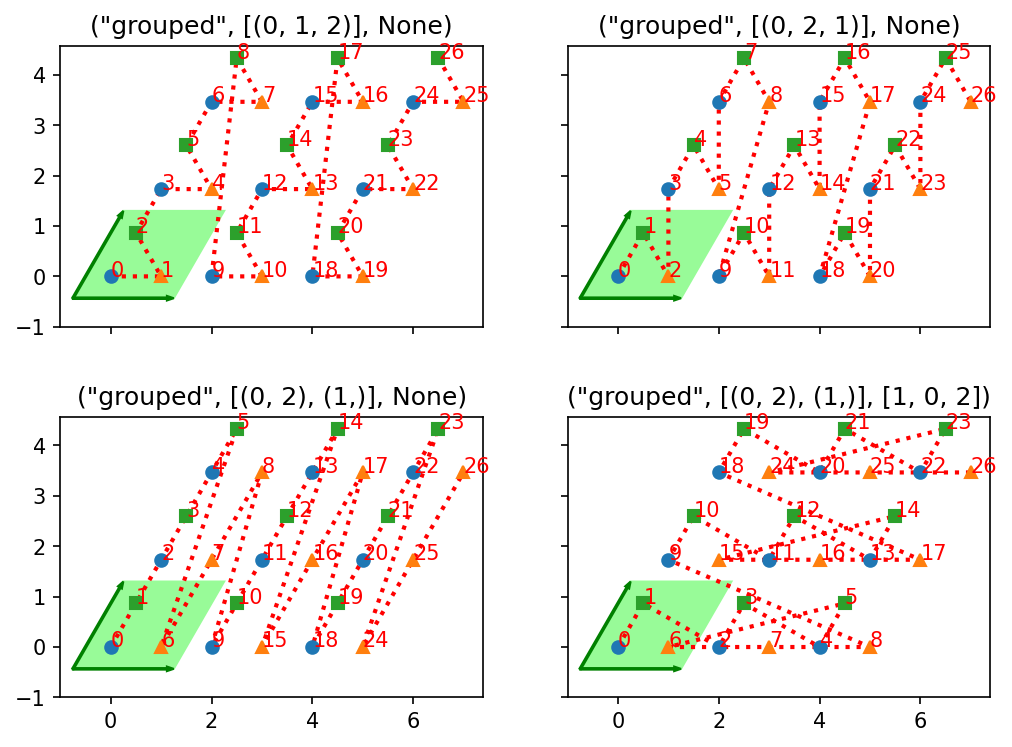

In [13]:
show(get_order_grouped)